# 1) Importing the usual libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Read the CVS file and create a pandas dataframe object 

In [4]:
df=pd.read_csv('Desktop/Data Material/airbnb prices.csv')

# 3) Review the first 5 rooms

In [6]:
df.head(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


# 4) What are the room_type available? 

In [8]:
df['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

# 5) Drop the shared room type as its count is too low compared to the others

In [6]:
df=df[df['room_type']!='Shared room']

In [7]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

# 6) Take a count of each neighborhood to show how popular they are with regards to airb'n'b appartment number

In [9]:
df.groupby('neighborhood')['room_id'].count().sort_values(ascending=False)

neighborhood
De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97


# 7) Find out about the number of reviews per rooms

In [9]:
df.groupby('reviews')['room_id'].count().sort_values(ascending=False)

reviews
0      2975
1      1500
2      1238
3      1100
4       924
5       874
6       737
7       680
8       589
9       527
11      497
10      474
12      395
14      362
13      340
15      308
16      300
17      261
18      236
20      226
19      213
21      189
22      166
23      158
24      153
27      137
25      133
26      125
28      112
29      112
       ... 
191       1
183       1
276       1
180       1
179       1
177       1
176       1
166       1
161       1
465       1
212       1
215       1
218       1
220       1
274       1
272       1
265       1
254       1
253       1
247       1
242       1
240       1
238       1
235       1
231       1
230       1
228       1
225       1
223       1
532       1
Name: room_id, Length: 283, dtype: int64

# 8) What is the overall satisfaction count for each rating?

In [10]:
df.groupby('overall_satisfaction')['room_id'].count().sort_values(ascending=False)

overall_satisfaction
5.0    7708
0.0    5748
4.5    4559
4.0     577
3.5     109
3.0      19
2.5       1
1.5       1
1.0       1
Name: room_id, dtype: int64

# 9) Create a sub dataset where the overall satisfaction is 0

In [12]:
satisfaction_0=df[df['overall_satisfaction']==0]

In [13]:
satisfaction_0.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.748000e+03,5748.0,5.748000e+03,0.0,0.0,5748.000000,5748.0,5748.000000,5748.000000,0.0,5748.000000,0.0,5748.000000,5748.000000
mean,1.472271e+07,1476.0,4.675185e+07,NaN,NaN,0.702157,0.0,3.024530,1.552018,NaN,175.313848,NaN,52.364367,4.889485
std,5.206503e+06,0.0,4.424354e+07,NaN,NaN,0.814230,0.0,1.367903,0.947871,NaN,139.889247,NaN,0.015782,0.036738
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,18.000000,NaN,52.296200,4.771083
25%,1.151526e+07,1476.0,9.748668e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353980,4.862770
50%,1.642867e+07,1476.0,2.966417e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363571,4.886525
75%,1.917368e+07,1476.0,7.653772e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,205.000000,NaN,52.374174,4.909833
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


# 10) What is the satisfaction ratings count where the total number of bedrooms is 3?

In [14]:
df[df['bedrooms']==3]['overall_satisfaction'].count()

1444

# 11) What is the satisfaction ratings count where the total number of bedrooms is 2?

In [15]:
df[df['bedrooms']==2]['overall_satisfaction'].count()

4456

# 12) What is the satisfaction ratings count where the price is beween 150 and 180?

In [16]:
df.loc[(df['price']>=150) & (df['price']<=180)]['overall_satisfaction'].count()

3809

# 13) Create a copy of the dataframe and impute the value 4 wherever the satisfaction count is 0?

In [17]:
df_copy=df.copy()

In [18]:
df_copy['overall_satisfaction']=np.where(df_copy['overall_satisfaction']==0,4,df_copy['overall_satisfaction'])

In [19]:
df_copy['overall_satisfaction'].unique()

array([4.5, 4. , 5. , 1.5, 3.5, 2.5, 3. , 1. ])

# 14) Find out the count of each accomodation value to understand where the most availability is?

In [21]:
df.groupby('price')['room_id'].count().sort_values(ascending=False)

price
119.0    1023
180.0    1001
144.0     887
150.0     621
132.0     588
         ... 
392.0       1
373.0       1
371.0       1
369.0       1
12.0        1
Name: room_id, Length: 423, dtype: int64

# 15) What is the proportion of each bedroom values in overall bedroom values

In [23]:
df['price_per_room']=df['price']/df['bedrooms']

In [24]:
df['price_per_room']

0        156.0
1        126.0
2        132.0
3        121.0
4         93.0
         ...  
18718     32.0
18719     24.0
18720     38.0
18721     36.0
18722     35.0
Name: price_per_room, Length: 18723, dtype: float64

In [28]:
df.groupby('room_type').mean()['price_per_room']

room_type
Entire home/apt          inf
Private room             inf
Shared room        103.68254
Name: price_per_room, dtype: float64

# 16) Drop the values where bedroom are equal to zero

In [23]:
df=df[df['bedrooms']!=0]

# 17) Count the number of bedrooms now that the null values have been removed?

In [24]:
df['bedrooms'].count()

17506

In [25]:
df.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,price_per_room
count,1.750600e+04,17506.0,1.750600e+04,0.0,0.0,17506.000000,17506.000000,17506.000000,17506.000000,0.0,17506.000000,0.0,17506.000000,17506.000000,17506.000000
mean,1.108287e+07,1476.0,3.509582e+07,NaN,NaN,16.368959,3.302868,2.960642,1.526220,NaN,169.137267,NaN,52.365207,4.888416,120.942720
std,6.080450e+06,0.0,3.710345e+07,NaN,NaN,32.796906,2.215583,1.333545,0.825627,NaN,111.009236,NaN,0.015112,0.034722,77.845518
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,1.000000,NaN,12.000000,NaN,52.296200,4.763264,12.000000
25%,5.923722e+06,1476.0,7.004309e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,113.000000,NaN,52.355178,4.863899,84.000000
50%,1.210997e+07,1476.0,1.956281e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364507,4.885528,114.000000
75%,1.643984e+07,1476.0,5.089235e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,196.000000,NaN,52.374604,4.907448,144.000000
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689,6000.000000


# 18) Plot an histogram of reviews where bins are 20 and the range is between 0 and 100

In [29]:
reviews_up_to_100=df.loc[(df['reviews']>0) & (df['reviews']<100)]

Text(0.5, 1.0, 'Distribution of Airbnbs with 0 to 100 reviews')

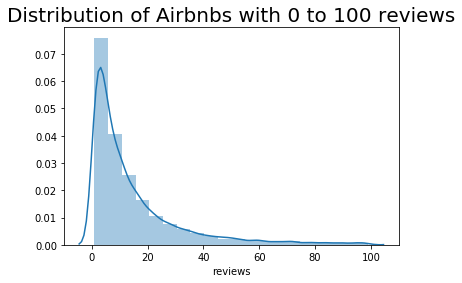

In [30]:
sns.distplot(reviews_up_to_100['reviews'],bins=20)
plt.title('Distribution of Airbnbs with 0 to 100 reviews',fontsize=20)

# 19) Plot an histogram of reviews where bins are 20 and the range is between 0 and 1000

In [31]:
reviews_up_to_1000=df.loc[(df['reviews']>0) & (df['reviews']<1000)]

Text(0.5, 1.0, 'Distribution of Airbnbs with 0 to 1000 reviews')

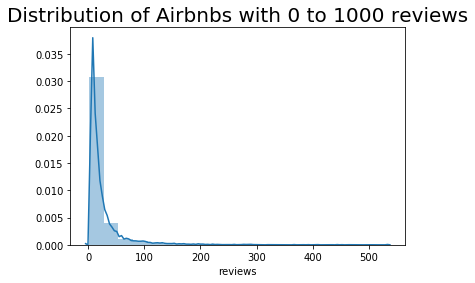

In [32]:
sns.distplot(reviews_up_to_1000['reviews'],bins=20)
plt.title('Distribution of Airbnbs with 0 to 1000 reviews',fontsize=20)

# 20) Plot an histogram of accomodates where bins are 16

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of accomodates')

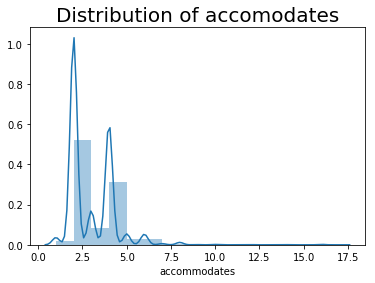

In [30]:
sns.distplot(df['accommodates'],bins=16)
plt.title('Distribution of accomodates',fontsize=20)

# 21) Plot a histogram of overall satisfaction

Text(0.5,0,'Overall Satisfaction')

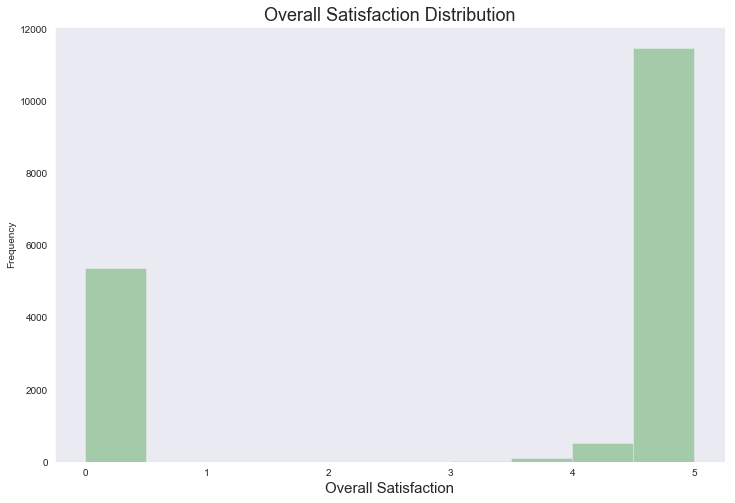

In [31]:
sns.set_style('dark')
plt.figure(figsize=(12,8))
df['overall_satisfaction'].plot(kind='hist',color='g',alpha=0.3)
plt.title('Overall Satisfaction Distribution',fontsize=18)
plt.xlabel('Overall Satisfaction',fontsize=15)

# 22) Plot a histogram of overall satisfaction where the price is equal t0 100 and 200

Text(0.5,0,'Overall Satisfaction')

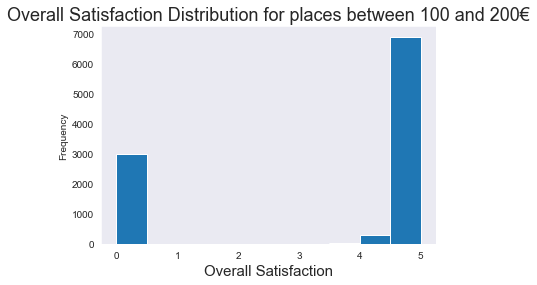

In [32]:
df.loc[(df['price']>=100) & (df['price']<=200)]['overall_satisfaction'].plot(kind='hist')
plt.title('Overall Satisfaction Distribution for places between 100 and 200€',fontsize=18)
plt.xlabel('Overall Satisfaction',fontsize=15)

# 23) Plot a histogram of overall satisfaction where the price is under 50

Text(0.5,0,'Overall Satisfaction')

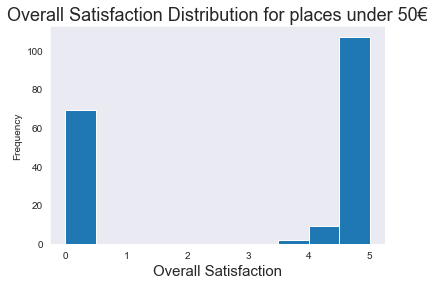

In [33]:

df[df['price']<50]['overall_satisfaction'].plot(kind='hist')
plt.title('Overall Satisfaction Distribution for places under 50€',fontsize=18)
plt.xlabel('Overall Satisfaction',fontsize=15)

# 24) Plot a histogram of overall satisfaction where the price is greater than 200

Text(0.5, 0, 'Overall Satisfaction')

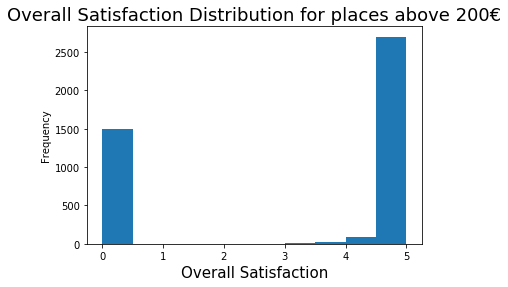

In [33]:
df[df['price']>200]['overall_satisfaction'].plot(kind='hist')
plt.title('Overall Satisfaction Distribution for places above 200€',fontsize=18)
plt.xlabel('Overall Satisfaction',fontsize=15)

# 25) Plot a histogram of overall satisfaction where the price is greater than 300

Text(0.5,0,'Overall Satisfaction')

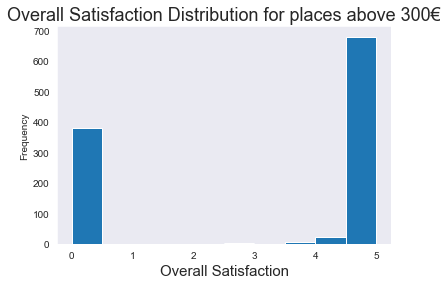

In [35]:
df[df['price']>300]['overall_satisfaction'].plot(kind='hist')
plt.title('Overall Satisfaction Distribution for places above 300€',fontsize=18)
plt.xlabel('Overall Satisfaction',fontsize=15)

# 26) Is there a relationship between price and reviews?

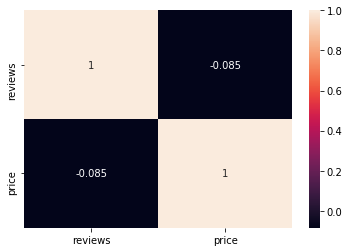

In [39]:
sns.heatmap(df[['reviews','price']].corr(),annot=True)

Text(0.5, 1.0, 'Price vs Reviews')

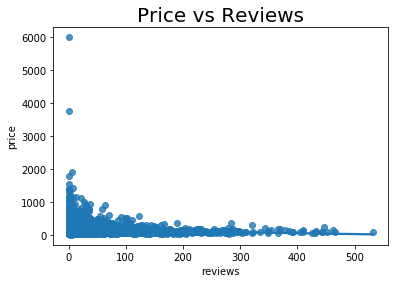

In [35]:
sns.regplot(x=df['reviews'],y=df['price'],data=df)
plt.title('Price vs Reviews',fontsize=20)

The above plot looks more like a Pareto distribution than anything

# 27) Is there a relationship between price and accomodates?

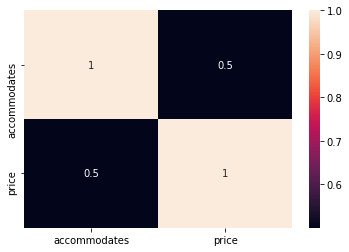

In [42]:
sns.heatmap(df[['accommodates','price']].corr(),annot=True)

There seems to be a low to moderate relationship between the two variables

Text(0.5, 1.0, 'Accomodates vs Reviews')

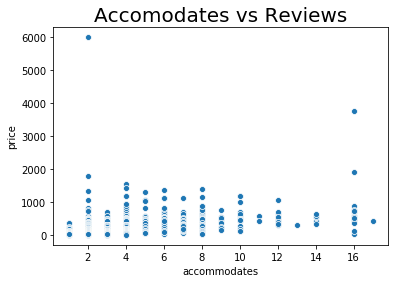

In [43]:
sns.scatterplot(x=df['accommodates'],y=df['price'],data=df)
plt.title('Accomodates vs Reviews',fontsize=20)

# 28) Is there a relationship between Bedroom and accomodates?

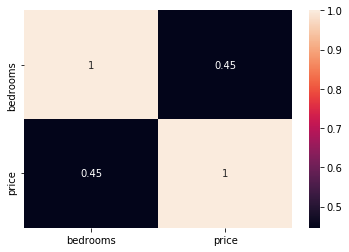

In [45]:
sns.heatmap(df[['bedrooms','price']].corr(),annot=True)

Same as above there seems to be a low to moderate relationship between the two variables given the correlation coefficient of 0.45

Text(0.5, 1.0, 'Bedrooms vs Reviews')

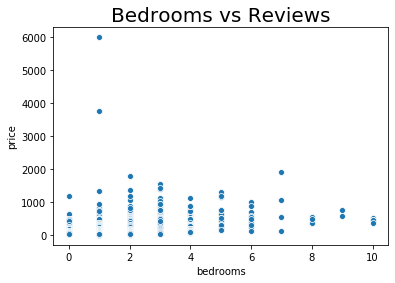

In [47]:
sns.scatterplot(x=df['bedrooms'],y=df['price'],data=df)
plt.title('Bedrooms vs Reviews',fontsize=20)

# 29) Is there a relationship between price and overall satisfaction?

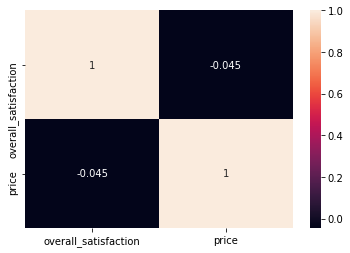

In [49]:
sns.heatmap(df[['overall_satisfaction','price']].corr(),annot=True)

there seems to be no satisfaction between the price and overall satisfaction given the low correlation coefficient

# 30)Plot the count of each registered neighborhood to understand in where to find the most availibility

Text(0.5, 1.0, 'Availibility per neighboorhood')

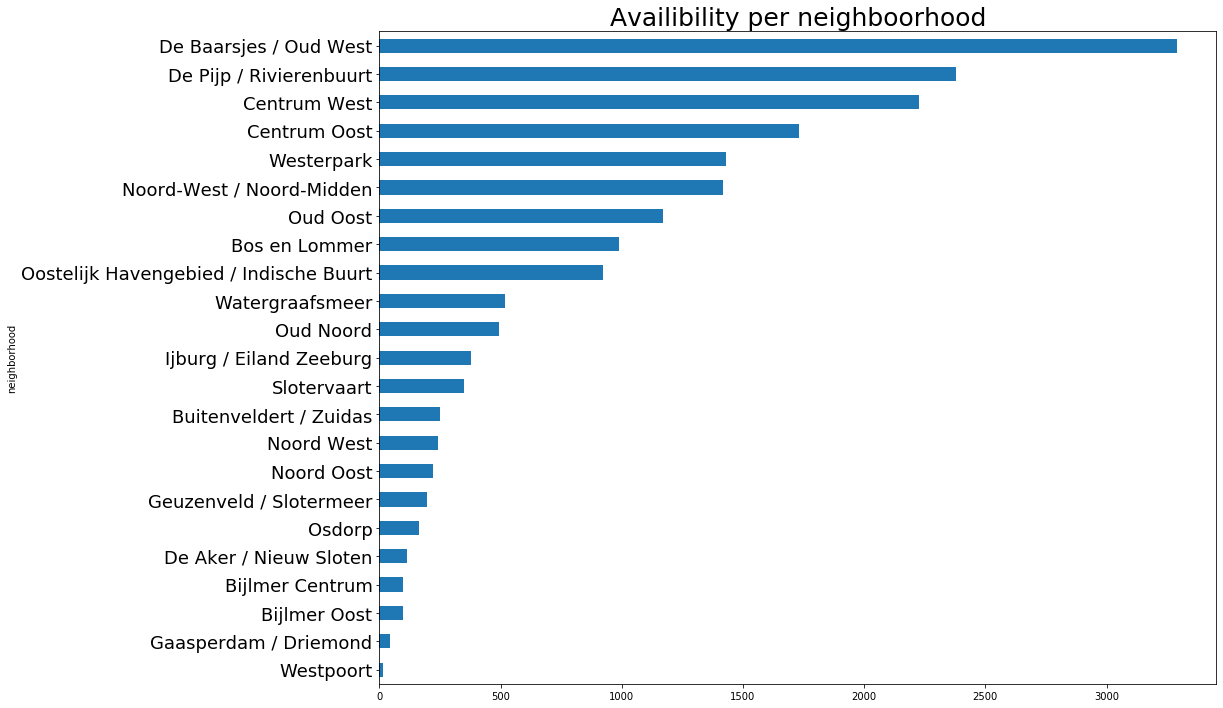

In [50]:
plt.figure(figsize=(15,12))
df.groupby('neighborhood')['room_id'].count().sort_values(ascending=True).plot.barh()
plt.yticks(fontsize=18)
plt.title('Availibility per neighboorhood',fontsize=25)

# 31)Remove the rows from the dataset where price is less than 1500

In [51]:
df_above_1500=df[df['price']>1500]

In [52]:
df_above_1500

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location,price_per_room
178,12837950,1476,22855069,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,0,0.0,...,1.0,NaN,6000.0,NaN,"Zonnige woonboot,centraal en rustig",2017-07-23 06:22:10.340921,52.373990,4.873597,0101000020E6100000EC884336907E1340F98381E7DE2F...,6000.000000
179,17377934,1476,117439187,Entire home/apt,NaN,Amsterdam,NaN,Geuzenveld / Slotermeer,0,0.0,...,2.0,NaN,1799.0,NaN,Welkom in noordzijde,2017-07-23 06:22:10.339020,52.371958,4.821506,0101000020E610000001DF6DDE3849134027BEDA519C2F...,899.500000
180,15626614,1476,60409350,Entire home/apt,NaN,Amsterdam,NaN,Centrum Oost,0,0.0,...,1.0,NaN,3770.0,NaN,One public bedroom,2017-07-23 06:22:10.336066,52.371641,4.901265,0101000020E6100000261E5036E59A1340266DAAEE912F...,3770.000000
181,16344025,1476,104389329,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,6,5.0,...,7.0,NaN,1920.0,NaN,AmsterdamBase,2017-07-23 06:22:10.333495,52.372837,4.898500,0101000020E6100000F2D24D62109813408FDE701FB92F...,274.285714
182,19408111,1476,47078997,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,...,3.0,NaN,1558.0,NaN,"Ultra luxe dreamboat, unforgettable stay promi...",2017-07-23 06:22:10.330886,52.372894,4.899198,0101000020E6100000B2834A5CC7981340F46F97FDBA2F...,519.333333


# 32) Import the revelant libraries from splitting the data and to implement a Linear Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 33) Create the X parameters by taking the review, satisfaction, accomodates and bedrooms columns. The price column would be the dependent variable

In [65]:
X=df[['reviews','overall_satisfaction','accommodates','bedrooms']]
y=df['price']

# 34) Split the data in train and test by holding 30% of the dataset for testing

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# 35) Fit the Linear Regression

In [67]:
linreg=LinearRegression()

In [68]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 36) Apply the prediction on the dependent variable

In [69]:
y_pred=linreg.predict(X_test)

# 37) Import the MAE,MSE and R2 Score from the metrics Library

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [71]:
print('R2 Score:',r2_score(y_test,y_pred))
print('Absolute Mean Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squarred Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score: 0.34256977000090016
Absolute Mean Error: 49.584501865169194
Mean Squared Error: 5605.378990357677
Root Mean Squarred Error: 74.86907900033015


# 38) Import the Decision Tree Regressor from sklearn library

In [72]:
from sklearn.tree import DecisionTreeRegressor

# 39) Initialize and fit the decision tree and training data

In [73]:
tree=DecisionTreeRegressor()

In [74]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# 40) Predict the values on the test data and store the results in the y_pred variable

In [75]:
y_tree_pred=tree.predict(X_test)

# 41) Identify the RMSE value and compare it to the Linear Regression

In [76]:
print('Tree Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_tree_pred)))

Tree Root Mean Squared Error: 85.01075711201726


In [77]:
regressors=[['Linear Regression:',LinearRegression()],
            ['Decision Tree Regressor:',DecisionTreeRegressor()]]

In [78]:
df_predictions=pd.DataFrame()
df_predictions['actual_labels']=y_test

In [79]:
for name,regressor in regressors:
    regressor=regressor
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    df_predictions[name.strip(':')]=y_test
    print('\n')
    print('------',name,'-----')
    print('\n')
    print('R2 Score:',r2_score(y_test,y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



------ Linear Regression: -----


R2 Score: 0.34256977000090016
RMSE: 74.86907900033015


------ Decision Tree Regressor: -----


R2 Score: 0.1601784799672431
RMSE: 84.61963646785651


# 42) Import the Cross Validation Score from the sklearn.model_selection and run the cross validation score on Linear Regression for 10 cross validation

In [84]:
from sklearn.model_selection import cross_val_score
lin_reg_score=cross_val_score(LinearRegression(),X,y,cv=10)

In [87]:
for name,regressor in regressors:
    regressor=regressor
    scores=cross_val_score(regressor,X,y,cv=10)
    print('\n')
    print('---',name,'---')
    print('\n')
    print('Scores:',scores)
    print('\n')
    print('Mean score:',scores.mean())
    print('Std score:',scores.std())



--- Linear Regression: ---


Scores: [ -0.38015714  -4.79291691  -1.76555307 -12.42155674  -6.6512588
 -18.689299   -60.18366156  -1.48491309  -0.443357   -13.14869145]


Mean score: -11.996136477223132
Std score: 17.124099382625346


--- Decision Tree Regressor: ---


Scores: [ -0.471017    -8.76664908  -2.96604032 -14.99709468  -8.64770398
 -20.12832996 -66.87725722  -1.66493987  -2.02825259 -14.43852048]


Mean score: -14.098580517290225
Std score: 18.684065943698243


In [89]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid={'max_depth': np.arange(1,21),
                 'min_samples_leaf': [1, 5, 10, 20, 50, 100]}

In [102]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,cv=10)

In [104]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                    

In [107]:
print('Best Scores:',grid.best_score_)
print('Best Params:',grid.best_params_)

Best Scores: 0.2922735816835685
Best Params: {'max_depth': 8, 'min_samples_leaf': 50}
